# Basic Model

In [1]:
%run utils_basic.ipynb 

2024-11-08 10:52:22.508914: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import pandas as pd
from itertools import product

In [3]:
data = load_data()

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
solar,17520.0,5102.071747,7380.083735,0.00,0.0,372.000,8685.0000,31286.0
wind_offshore,17520.0,2622.886358,1994.457526,23.00,834.0,2112.000,4375.0000,6664.0
wind_onshore,17520.0,6855.022603,5748.266745,63.00,2091.0,5208.000,10509.2500,25740.0
total_load,17520.0,43650.042009,9299.060769,1915.00,39456.0,44338.000,49335.2500,85027.0
price,17520.0,241.924402,131.529528,-222.36,160.0,216.995,304.9425,871.0


In [52]:
ad_fuller_result_price = adfuller(data['price'])
print('realdpi')
print(f'ADF Statistic: {ad_fuller_result_price[0]}')
print(f'p-value: {ad_fuller_result_price[1]}')

realdpi
ADF Statistic: -6.460620183316498
p-value: 1.4463287635560383e-08


In [53]:
ad_fuller_result_onshore_wind = adfuller(data['wind_onshore'])
print('realdpi')
print(f'ADF Statistic: {ad_fuller_result_onshore_wind[0]}')
print(f'p-value: {ad_fuller_result_onshore_wind[1]}')

realdpi
ADF Statistic: -10.823244970225652
p-value: 1.7833909544365218e-19


In [45]:
import statsmodels.api as sm
macro_econ_data = sm.datasets.macrodata.load_pandas().data
macro_econ_data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [62]:
from statsmodels.tsa.stattools import grangercausalitytests
f = 'solar'
print(f'{f} Granger-causes price?\n')
print('------------------')
granger_1 = grangercausalitytests(data[['price', f]], 3)

solar Granger-causes price?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=266.3220, p=0.0000  , df_denom=17516, df_num=1
ssr based chi2 test:   chi2=266.3676, p=0.0000  , df=1
likelihood ratio test: chi2=264.3629, p=0.0000  , df=1
parameter F test:         F=266.3220, p=0.0000  , df_denom=17516, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=765.6075, p=0.0000  , df_denom=17513, df_num=2
ssr based chi2 test:   chi2=1531.6521, p=0.0000  , df=2
likelihood ratio test: chi2=1468.3573, p=0.0000  , df=2
parameter F test:         F=765.6075, p=0.0000  , df_denom=17513, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=578.6901, p=0.0000  , df_denom=17510, df_num=3
ssr based chi2 test:   chi2=1736.7644, p=0.0000  , df=3
likelihood ratio test: chi2=1655.9654, p=0.0000  , df=3
parameter F test:         F=578.6901, p=0.0000  , df_denom=17510, df_num=3


In [64]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np

data = sm.datasets.macrodata.load_pandas()
data = data.data[["realgdp", "realcons"]].pct_change().dropna()
gc_res = grangercausalitytests(data, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=28.7248 , p=0.0000  , df_denom=198, df_num=1
ssr based chi2 test:   chi2=29.1600 , p=0.0000  , df=1
likelihood ratio test: chi2=27.2295 , p=0.0000  , df=1
parameter F test:         F=28.7248 , p=0.0000  , df_denom=198, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=18.9880 , p=0.0000  , df_denom=195, df_num=2
ssr based chi2 test:   chi2=38.9498 , p=0.0000  , df=2
likelihood ratio test: chi2=35.5873 , p=0.0000  , df=2
parameter F test:         F=18.9880 , p=0.0000  , df_denom=195, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=13.5015 , p=0.0000  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=41.9812 , p=0.0000  , df=3
likelihood ratio test: chi2=38.0914 , p=0.0000  , df=3
parameter F test:         F=13.5015 , p=0.0000  , df_denom=192, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=10.9646 , p=0.0000  

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2022-01-01 01:00:00 to 2024-01-01 00:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17520 non-null  float64
 1   wind_offshore  17520 non-null  int64  
 2   wind_onshore   17520 non-null  int64  
 3   solar          17520 non-null  int64  
 4   total_load     17520 non-null  int64  
 5   WeekOfYear     17520 non-null  UInt32 
 6   Day            17520 non-null  int32  
 7   Month          17520 non-null  int32  
 8   Year           17520 non-null  int32  
 9   HourOfDay_sin  17520 non-null  float64
 10  HourOfDay_cos  17520 non-null  float64
 11  DayOfWeek_sin  17520 non-null  float64
 12  DayOfWeek_cos  17520 non-null  float64
dtypes: UInt32(1), float64(5), int32(3), int64(4)
memory usage: 1.6 MB


In [4]:
p = range(0,4,1)
q = range(5,13,3)
list(product(p,q))

[(0, 5),
 (0, 8),
 (0, 11),
 (1, 5),
 (1, 8),
 (1, 11),
 (2, 5),
 (2, 8),
 (2, 11),
 (3, 5),
 (3, 8),
 (3, 11)]

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
%run utils_basic.ipynb 

2024-11-07 09:55:58.847908: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [76]:
data[['wind_onshore','wind_offshore','solar']].head(20)

,wind_onshore,wind_offshore,solar
Date,,,
2022-01-01 01:00:00,10585,5411,0
2022-01-01 02:00:00,9679,5230,0
2022-01-01 03:00:00,8647,4939,0
2022-01-01 04:00:00,7819,4517,0
2022-01-01 05:00:00,6827,4176,0
2022-01-01 06:00:00,5847,4090,0
2022-01-01 07:00:00,5266,3939,0
2022-01-01 08:00:00,4961,4017,0
2022-01-01 09:00:00,5583,4498,0


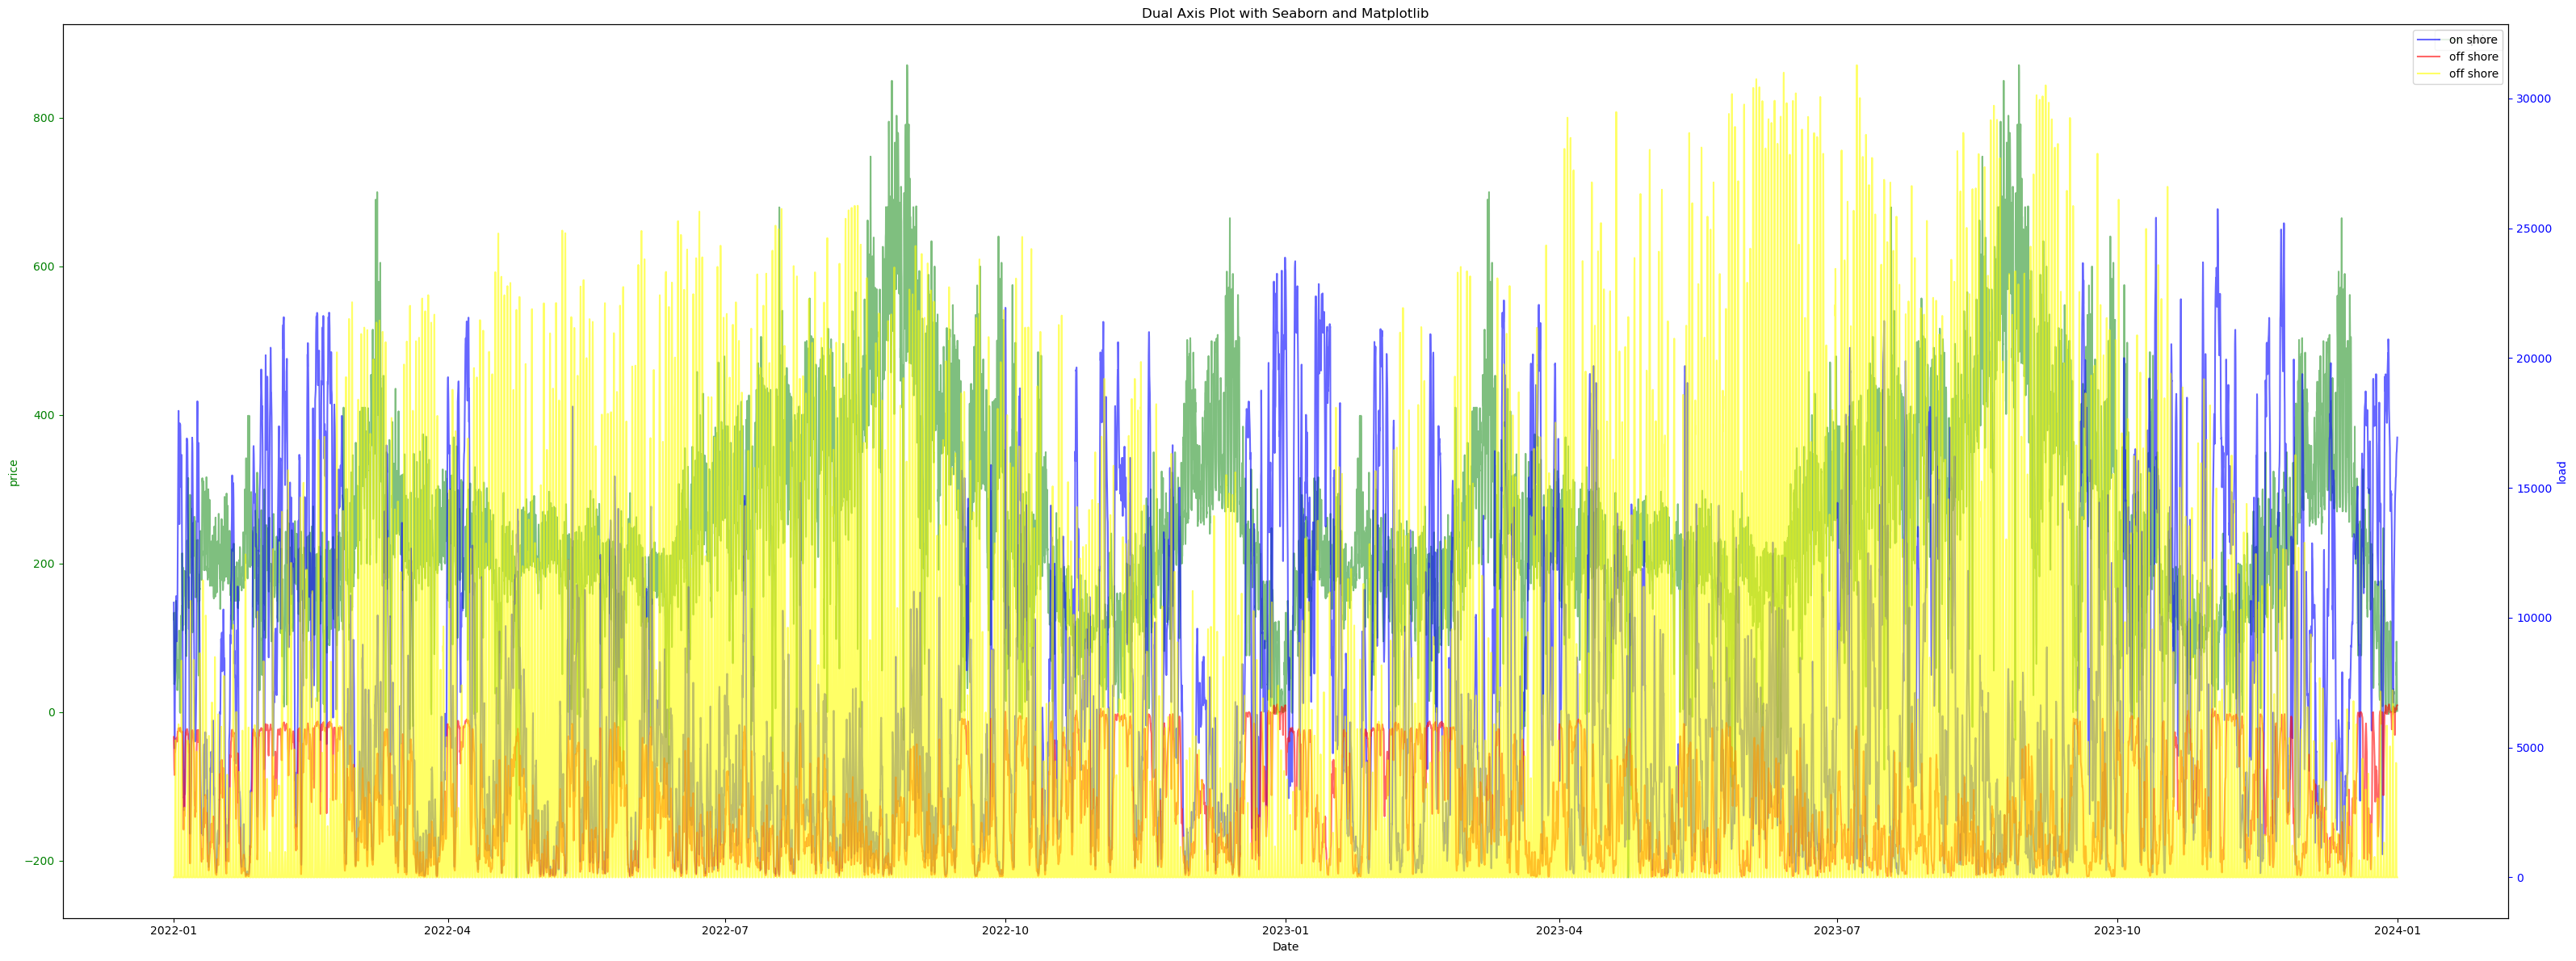

In [77]:
# data['price'].resample('D').mean().plot(color='y', legend=True)
# data.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
# data.Global_intensity.resample('W').mean().plot(color='g', legend=True)
# Create a figure and an axis object
fig, ax1 = plt.subplots(figsize=(32, 12))

# Plot the first line with Seaborn
sns.lineplot(x=data.index, y='price', data=data, ax=ax1, color='g', label='price', alpha = 0.5)
ax1.set_ylabel('price', color='g')
ax1.tick_params(axis='y', colors='g')

# Create a second y-axis for the second line
ax2 = ax1.twinx()
sns.lineplot(x=data.index, y='wind_onshore', data=data, ax=ax2, color='b', label='on shore', alpha = 0.6)
sns.lineplot(x=data.index, y='wind_offshore', data=data, ax=ax2, color='red', label='off shore', alpha = 0.6)
sns.lineplot(x=data.index, y='solar', data=data, ax=ax2, color='yellow', label='off shore', alpha = 0.6)
ax2.set_ylabel('load', color='b')
ax2.tick_params(axis='y', colors='b')

# Title and legend
plt.title('Dual Axis Plot with Seaborn and Matplotlib')
fig.tight_layout()  # Adjusts plot to minimize overlap
plt.show()

<Axes: xlabel='Date'>

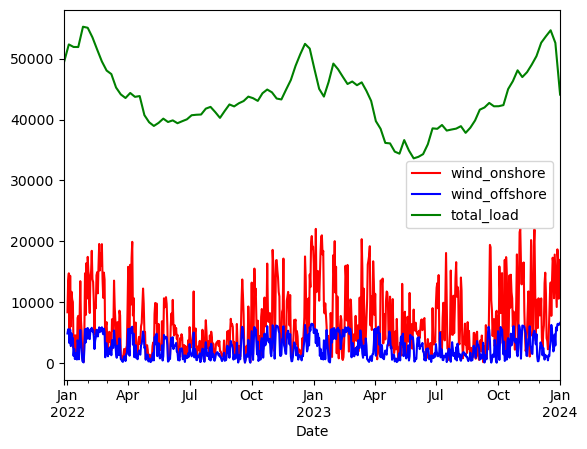

In [59]:
data['wind_onshore'].resample('D').mean().plot(color='r', legend=True)
data['wind_offshore'].resample('D').mean().plot(color='b', legend=True)

data['total_load'].resample('W').mean().plot(color='g', legend=True)

## model runner

In [15]:
def model_runner(data):
    data = day_flag(data)
    data = data[data.columns]
    data = data_scaler(data)
    # train test split
    train_data, test_data = train_test_split_7(data)
    
    # features = ['price', 'wind_onshore', 'wind_offshore', 'solar', 'total_load']
    # create sequences
    seq_length = 24
    X_train, y_train = create_sequences_2(train_data, seq_length, data.columns)
    X_test, y_test = create_sequences_2(test_data, seq_length, data.columns)
    
    # input shape
    input_shape = (X_train.shape[1], X_train.shape[2])
    
    # run model
    lstm_model = create_lstm_model(input_shape)
    lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
    
    # predictions
    y_preds = lstm_model.predict(X_test)
    
    # evaluations
    
    y_test_original, y_preds_original = eva(y_test, y_preds, X_test)

    return lstm_model, y_test_original, y_preds_original

In [16]:
data = load_data()

In [ ]:
model, test, preds = model_runner(data)

## Lagged Data

In [10]:
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(data['price'])
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -6.460620183316498
p-value: 1.4463287635560383e-08


,price,wind_offshore,wind_onshore,solar,total_load,WeekOfYear,Day,Month,Year,HourOfDay_sin,HourOfDay_cos,DayOfWeek_sin,DayOfWeek_cos
Date,,,,,,,,,,,,,
2022-01-03 04:00:00,-1.05,5764,17421,0,41885,1,3,1,2022,8.660254e-01,0.500000,0.000000,1.000000
2022-03-19 13:00:00,-8.02,3141,6019,21367,28411,11,19,3,2022,-2.588190e-01,-0.965926,-0.974928,-0.222521
2022-03-19 14:00:00,-22.89,3456,6813,22018,27609,11,19,3,2022,-5.000000e-01,-0.866025,-0.974928,-0.222521
2022-03-19 15:00:00,-3.80,3885,7854,21151,29214,11,19,3,2022,-7.071068e-01,-0.707107,-0.974928,-0.222521
2022-03-20 12:00:00,-5.31,2571,7649,16155,25681,11,20,3,2022,1.224647e-16,-1.000000,-0.781831,0.623490


In [22]:
y_min = data['price'].min()
y_shifted_log = np.log(data['price'] - y_min + 1)

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load and preprocess your dataset
# data = pd.read_csv('your_data.csv', parse_dates=['date'], index_col='date')
# data = load_data()
data = load_data()
data['DayOfWeek'] = data.index.dayofweek              # Day of the week (0=Monday, 6=Sunday)
data['WeekOfYear'] = data.index.isocalendar().week    # ISO week number of the year
data['Day'] = data.index.day                          # Day of the month
data['Month'] = data.index.month                      # Month of the year
data['Year'] = data.index.year                        # Year
data['PeriodOfDay'] = data.index.hour                 # Hour of the day (0-23)
# features = ['price', 'wind_offshore', 'wind_onshore', 'solar', 'total_load', 'DayOfWeek', 'WeekOfYear', 'Day', 'Month', 'Year', 'PeriodOfDay']
# data = data[features]
# Add cyclic transformations for HourOfDay and DayOfWeek
data['HourOfDay_sin'] = np.sin(2 * np.pi * data['PeriodOfDay'] / 24)
data['HourOfDay_cos'] = np.cos(2 * np.pi * data['PeriodOfDay'] / 24)

data['DayOfWeek_sin'] = np.sin(2 * np.pi * data['DayOfWeek'] / 7)
data['DayOfWeek_cos'] = np.cos(2 * np.pi * data['DayOfWeek'] / 7)

# Drop original cyclic features if you want to avoid redundancy
data.drop(['PeriodOfDay', 'DayOfWeek'], axis=1, inplace=True)

# Use only current values for 'WeekOfYear', 'Day', 'Month', 'Year' without lagging
features = ['price',  'wind_offshore', 'wind_onshore', 'solar', 'total_load',
            'WeekOfYear', 'Day', 'Month', 'Year', 
            'HourOfDay_sin', 'HourOfDay_cos', 'DayOfWeek_sin', 'DayOfWeek_cos']



data = data[features]

# Generate lagged features for continuous features like price and energy generation
def create_lagged_features(data, features, lag_steps):
    data_with_lags = data.copy()
    for feature in features:
        for lag in lag_steps:
            data_with_lags[f'{feature}_lag_{lag}'] = data_with_lags[feature].shift(lag)
    return data_with_lags.dropna()

# lag_steps = [1, 2, 25, 168]  # Previous hour, day, and week lags
# data_with_lags = create_lagged_features(data, ['price', 'wind_offshore', 'wind_onshore', 'solar', 'total_load'], lag_steps)
data_with_lags = data.copy()
# Scale and prepare sequences for LSTM training
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_with_lags), columns=data_with_lags.columns, index=data_with_lags.index)

# Define function to create sequences
def create_sequences(data, seq_length, target_column):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length].values)  # All features for each sequence
        y.append(data.iloc[i+seq_length][target_column])  # Target at the next time step
    return np.array(X), np.array(y)

seq_length =24
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# train_data, test_data = train_test_split_7(data_scaled)  # Assuming train_test_split_7 is predefined

X_train, y_train = create_sequences(train_data, seq_length, target_column='price')
X_test, y_test = create_sequences(test_data, seq_length, target_column='price')

# Define and train the LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        # LSTM(32, return_sequences=False),
        LSTM(32, return_sequences=True),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mae')
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
lstm_model = create_lstm_model(input_shape)

# Convert to float32 to avoid TensorFlow dtype issues
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')


lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Predict and evaluate
lstm_lag_preds = lstm_model.predict(X_test)

# Invert scaling for predictions and actual values
y_test_inverse = scaler.inverse_transform(
    np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]
lstm_lag_preds_inverse = scaler.inverse_transform(
    np.concatenate((lstm_lag_preds, X_test[:, -1, 1:]), axis=1))[:, 0]


def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))
# Calculate performance metrics
mae = mean_absolute_error(y_test_inverse, lstm_lag_preds_inverse)
rmse = np.sqrt(mean_squared_error(y_test_inverse, lstm_lag_preds_inverse))

smape_value_attention = smape(y_test_inverse, lstm_lag_preds_inverse)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Symmetric Mean Absolute Percentage Error (sMAPE): {smape_value_attention:.2f}")

Epoch 1/20


/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


394/394 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.1239 - val_loss: 0.1068
Epoch 2/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0790 - val_loss: 0.1099
Epoch 3/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0766 - val_loss: 0.1015
Epoch 4/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0753 - val_loss: 0.1052
Epoch 5/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0778 - val_loss: 0.1088
Epoch 6/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0773 - val_loss: 0.1095
Epoch 7/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0781 - val_loss: 0.1020
Epoch 8/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0789 - val_loss: 0.1050
Epoch 9/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0776 - val_loss: 0.1039
Epoch 10/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0767 - val_loss: 0.0997
Epoch 11/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0775 - val_loss: 0.1055
Epoch 12/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/ste

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

<!-- Mean Absolute Error (MAE): 30.73
Root Mean Squared Error (RMSE): 42.08
Symmetric Mean Absolute Percentage Error (sMAPE): 17.47 -->

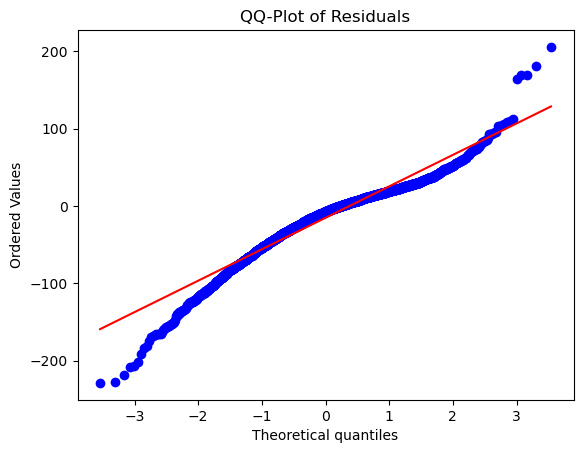

In [44]:
# lstm_model.resid

import matplotlib.pyplot as plt
import scipy.stats as stats
resi =  lstm_lag_preds_inverse - y_test_inverse

# Assuming `residuals` is a list or array of residual values
stats.probplot(resi, dist="norm", plot=plt)
plt.title("QQ-Plot of Residuals")
plt.show()

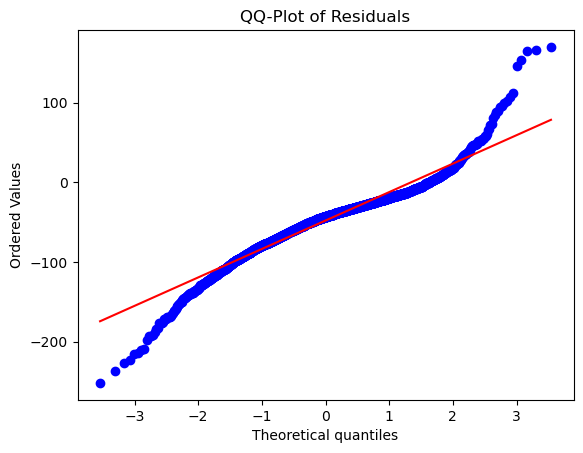

In [36]:
# lstm_model.resid

import matplotlib.pyplot as plt
import scipy.stats as stats
resi =  lstm_lag_preds_inverse - y_test_inverse

# Assuming `residuals` is a list or array of residual values
stats.probplot(resi, dist="norm", plot=plt)
plt.title("QQ-Plot of Residuals")
plt.show()


In [25]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lbvalue, pvalue = acorr_ljungbox(resi, np.arange(1, 11, 1))
print(pvalue)

lb_pvalue


In [27]:
acorr_ljungbox(resi, np.arange(1, 11, 1))

,lb_stat,lb_pvalue
1,785.704010,6.923116e-173
2,1765.227828,0.000000e+00
3,2744.689893,0.000000e+00
4,3352.010698,0.000000e+00
5,4117.765693,0.000000e+00
6,4791.619846,0.000000e+00
7,5368.771777,0.000000e+00
8,5988.692090,0.000000e+00
9,6605.587793,0.000000e+00
10,7236.130408,0.000000e+00


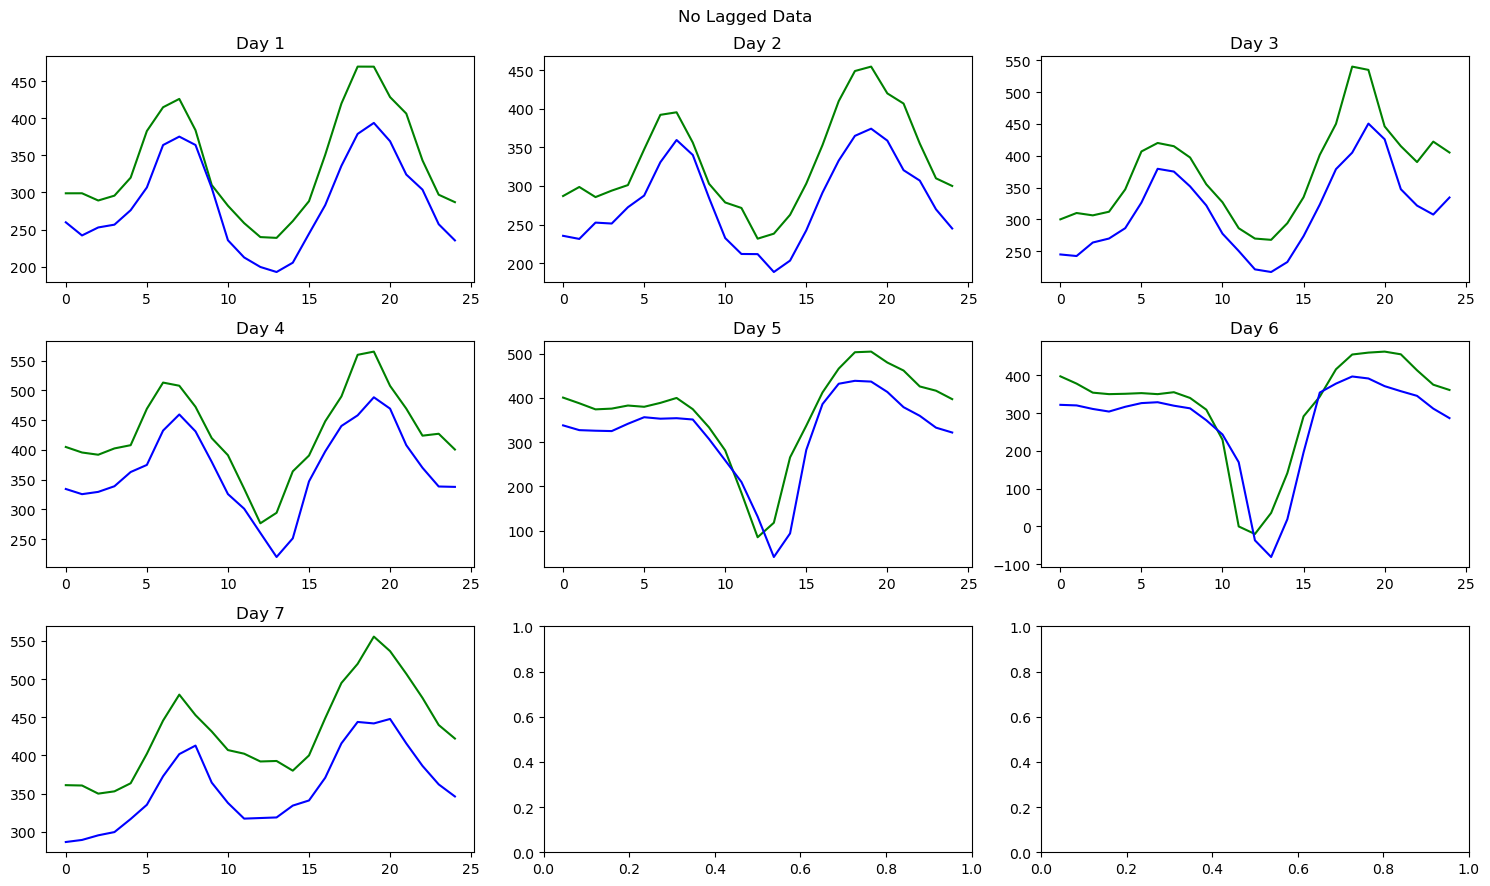

In [39]:
n = 7
fig, axs = plt.subplots(3, 3, figsize = (15,9))

for i in range(n):
    start = 24 * i
    end = 24 * (i+1) + 1    
    ax = axs.flatten()[i]
    sns.lineplot(y_test_inverse[start:end], c = 'g', ax = ax)
    sns.lineplot(lstm_lag_preds_inverse[start:end], c = 'blue', ax = ax)
    ax.set_title(f'Day {i+1}') 

fig.suptitle('No Lagged Data')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display all subplots together
# sns.lineplot(test_data[['wind_offshore']][:n], c = 'blue')

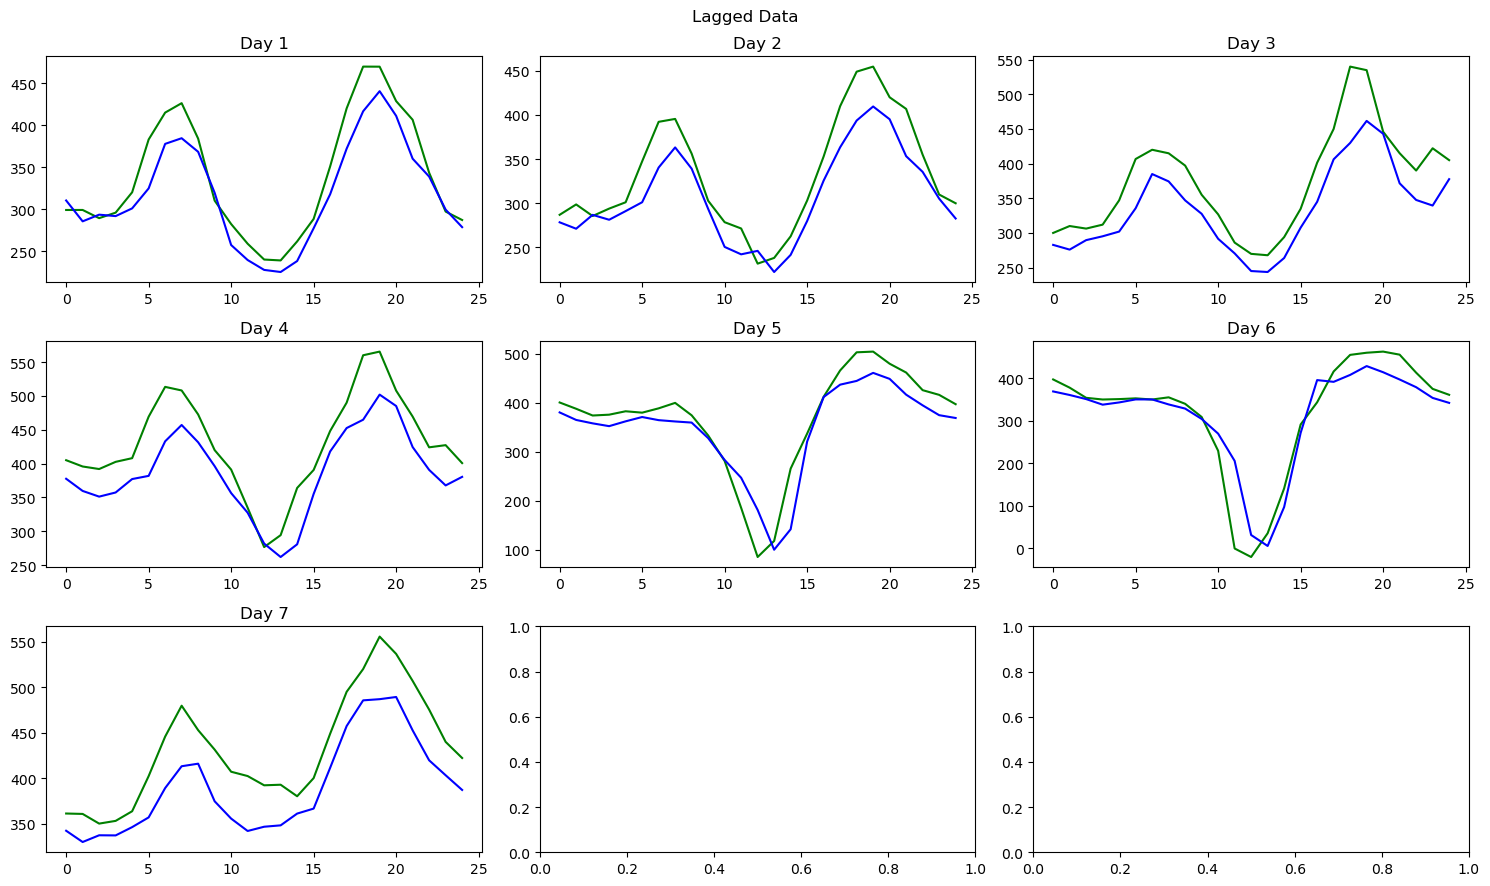

In [43]:
n = 7
fig, axs = plt.subplots(3, 3, figsize = (15,9))

for i in range(n):
    start = 24 * i
    end = 24 * (i+1) + 1    
    ax = axs.flatten()[i]
    sns.lineplot(y_test_inverse[start:end], c = 'g', ax = ax)
    sns.lineplot(lstm_lag_preds_inverse[start:end], c = 'blue', ax = ax)
    ax.set_title(f'Day {i+1}') 

fig.suptitle('Lagged Data')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display all subplots together
# sns.lineplot(test_data[['wind_offshore']][:n], c = 'blue')

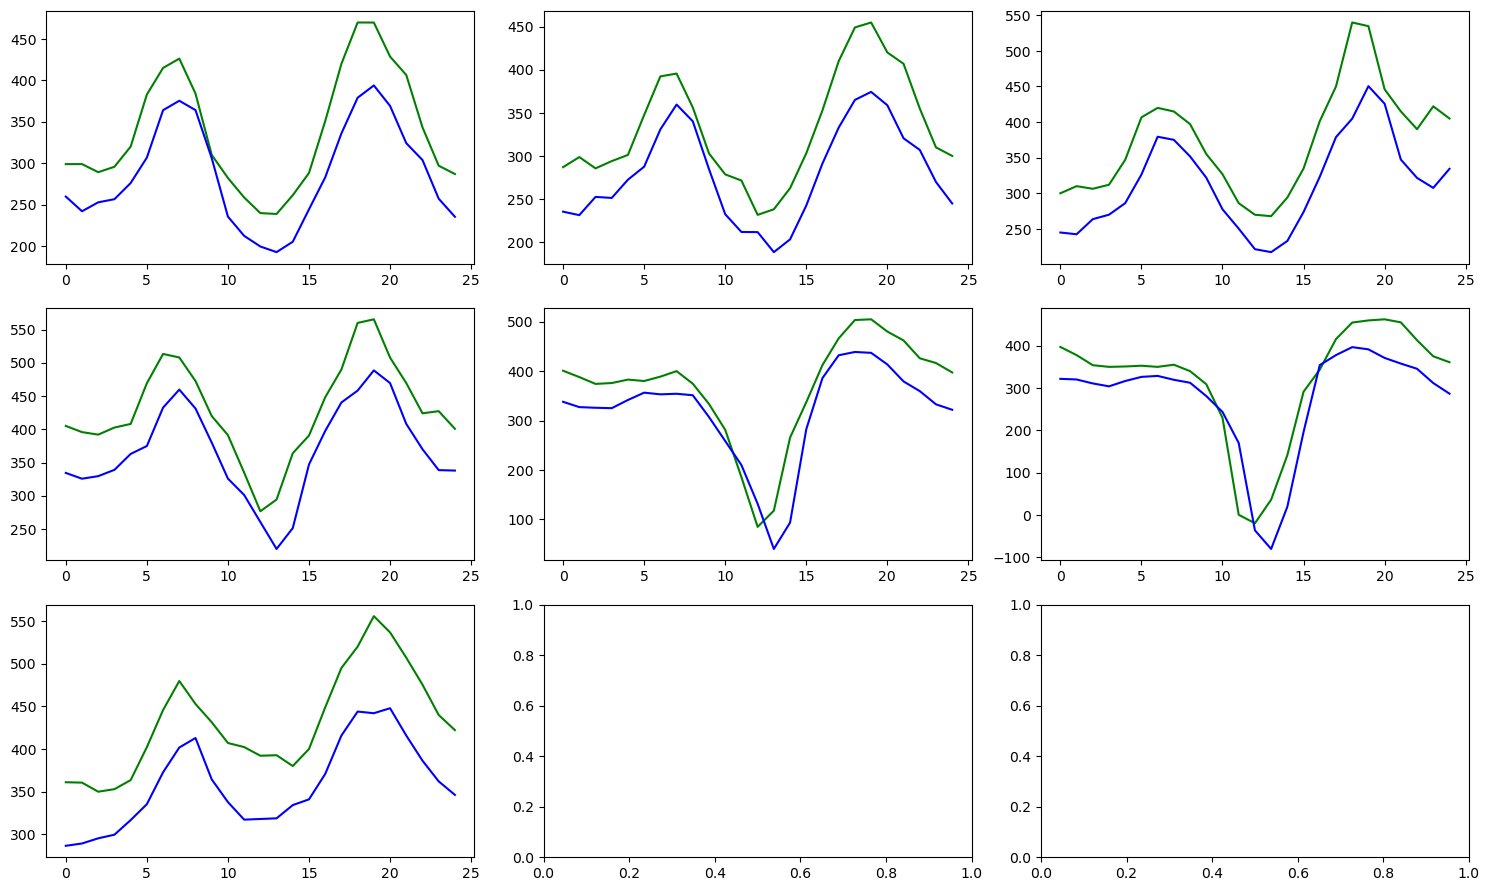

In [41]:
n = 7
fig, axs = plt.subplots(3, 3, figsize = (15,9))

for i in range(n):
    start = 24 * i
    end = 24 * (i+1) + 1    
    sns.lineplot(y_test_inverse[start:end], c = 'g', ax = axs.flatten()[i])
    sns.lineplot(lstm_lag_preds_inverse[start:end], c = 'blue', ax = axs.flatten()[i])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display all subplots together
# sns.lineplot(test_data[['wind_offshore']][:n], c = 'blue')

In [49]:
type(y_test_inverse)

numpy.ndarray

In [51]:
len(test_data)

4033

In [52]:
len(lstm_lag_preds_inverse)

4009